In [2]:
import numpy as np
from scipy.integrate import odeint
# import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT
import math

In [3]:
#function that returns dy/dt
def model(z,t,co):
    # Initial conditions
    N = z[0] #N = naive T-cells
    T = z[1] #T = Activated T-cells
    I = z[2] #I = IL-2
    R = z[3] #R = TRegs
    
    # Constant Values
    beta = co[0]
    mu =co[1]
    delta_N = co[2]   
    a = co[3]
    delta_T = co[4]
    s = co[5]
    e_T = co[6]
    delta_I = co[7]
    alpha = co[8]
    c = co[9]
    g = co[10]
    e_R = co[11]
    p = co[12]
    r = co[13]
    delta_R = co[14]
    Thy = co[15]
    Thy_max = co[16]

    
    dRdt = alpha*(Thy/Thy_max) + g*N + c*R - delta_R*R*(1/(1+math.exp(p*I)))
    dNdt = beta*(Thy/Thy_max) - mu*N*(1/(1+math.exp(r*I))) - g*N - delta_N*N 
    dTdt = mu*N*(1/(1+math.exp(r*I))) + a*I*T - delta_T*T
    dIdt = s*T - e_T*I*T - e_R*I*R - delta_I*I
    
    
    return [dNdt, dTdt, dIdt, dRdt]

In [44]:
############################
#  Thymus and limitations  #
############################
alpha = 1 #------------ T Regulatory Cells
beta = 50   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus


#########################################
#  Naive T cell Differentiation Rates   #
#########################################
g = 0.001 #--------To T regulatory Cells
mu = 0.3 #------ To activated T cells
r = 5  #------- Strength of suppression on Naive T cell differention to activation

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
s = 0 #.7 #------- T Cell Expression
e_T = 0.01 #------ T Cell Consumption Rate
e_R = 0.01 #------ T Reg Consumption Rate

######################################################
#  IL-2 Cytokine Effects and Self Replication Rates  #
######################################################
p = 1 #----- Strenght of effect on Treg death Rate
a = 0.01   #------------Activated T cells
c = 0.2 #------------T regulatory cells

##################
#  Death Rates   #
##################
delta_N = 0.01 #-----------Naive T cells
delta_T = 0.1 #-----------Activated T cells
delta_R = 0.8 #----------Regulatory T Cells
delta_I = 1 #-------------IL-2 Cytokine

#Constants are saved in a array that is fed to the odeint function
co = [beta, mu, delta_N, a,delta_T,s,e_T,delta_I, alpha, c, g, e_R, p,r,delta_R, Thy, Thy_max]

# time points
#t = np.linspace(0,10)
numTime = 2000;
t = np.linspace(0,200,num=numTime,endpoint=True)

# initial condition # z0 = [N,T,I,R]
z0 = [300,66,0,50]

# solve ODE
z = odeint(model,z0,t, args=(co,))

N = z[:,0]
T = z[:,1]
I = z[:,2]
R = z[:,3]

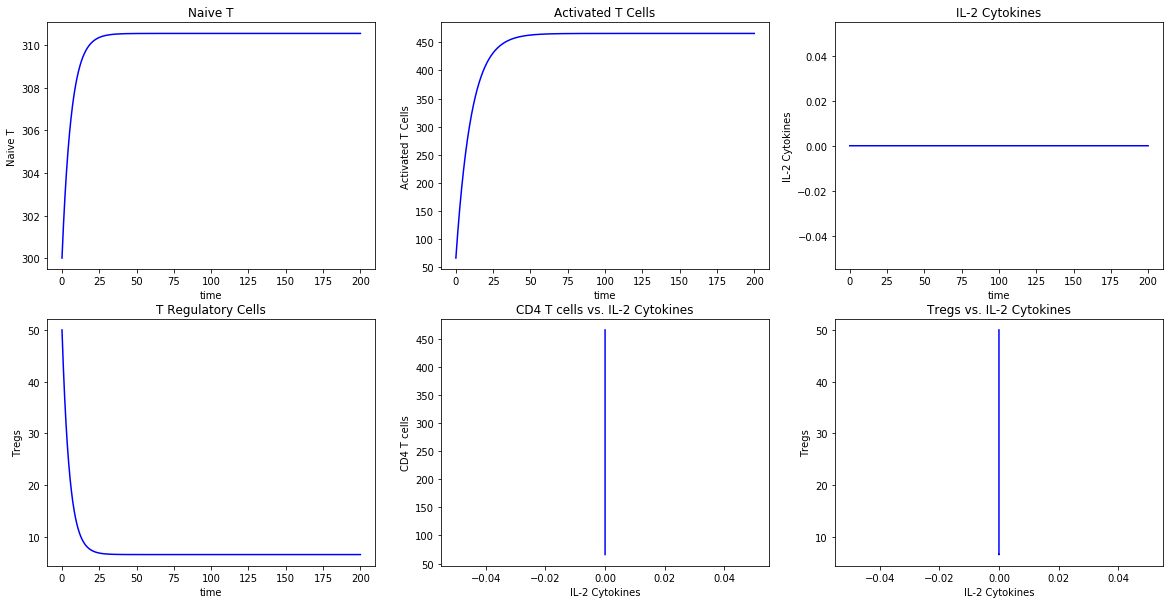

In [45]:
fig = PLT.figure(figsize=(20,10))

ax1 = fig.add_subplot(231)
ax1.plot(t,N, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Naive T')
ax1.set_title('Naive T')

ax2 = fig.add_subplot(232)
ax2.plot(t,T,'b-')
ax2.set_xlabel('time')
ax2.set_ylabel('Activated T Cells')
ax2.set_title('Activated T Cells')


ax3 = fig.add_subplot(233)
ax3.plot(t,I,'b-')
ax3.set_xlabel('time')
ax3.set_ylabel('IL-2 Cytokines')
ax3.set_title('IL-2 Cytokines')

ax4 = fig.add_subplot(234)
ax4.plot(t,R,'b-')
ax4.set_xlabel('time')
ax4.set_ylabel('Tregs')
ax4.set_title('T Regulatory Cells')

ax5 = fig.add_subplot(235)
ax5.plot(I,T,'b-')
ax5.set_xlabel('IL-2 Cytokines')
ax5.set_ylabel('CD4 T cells')
ax5.set_title('CD4 T cells vs. IL-2 Cytokines')

ax6 = fig.add_subplot(236)
ax6.plot(I,R,'b-')
ax6.set_xlabel('IL-2 Cytokines')
ax6.set_ylabel('Tregs')
ax6.set_title('Tregs vs. IL-2 Cytokines')

PLT.show()

In [32]:
# co = [beta, mu, delta_N, a,delta_T,s,e_T,delta_I, alpha, c, g, e_R, p,r,delta_R, Thy, Thy_max]
# I FOUND HOMEOSTASIS
co = [50, 0.03, 0.01, 0.01, 0.1, 0.7, 0.01, 1, 1, 0.2, 0.001, 0.01, 1, 1, 0.8, 1, 1]
#co = [0,  0.03, 0.01, 0]
# Death by treg
# co = [50, 0.03, 0.01, 0.01, 0.1, 0.7, 0.01, 1, 1, 0.2, 0.001, 0.01, 1, 5, 0.8, 1, 1]
# A DROP OF T CELLS WITH A T REG NUMBERS
# co = [20, 0.01, 0.01, 0.01, 0.1, 0.6, 0.01, 1, 1, 0.2, 0.01, 0.01, 0, 0, 0, 1, 1]
# The collapse of treg numbers via the suppression of tregs and drop in il-2 numbers
# co = [50, 0.03, 0.01, 0.01, 0.2, 0.6, 0.01, 1, 1, 0.2, 0.001, 0.01, 1, 1, 0.65, 1, 1]
# With a sudden rise in the tregs activated T cells drops, and because IL-2 drops, T regs drop as well
# co = [50, 0.03, 0.01, 0.01, 0.1, 0.6, 0.01, 1, 1, 0.2, 0.001, 0.01, 1, 5, 0.8, 1, 1]


# time points
#t = np.linspace(0,10)
t = np.linspace(0,400,num=4000,endpoint=True)

# initial condition # z0 = [N,T,I,R]
z0 = [300,66,30,50]

# solve ODE
z = odeint(model,z0,t, args=(co,))

N = z[:,0]
T = z[:,1]
I = z[:,2]
R = z[:,3]


In [21]:
t = np.linspace(0,10,num=200,endpoint=True)


In [22]:
t

array([ 0.        ,  0.05025126,  0.10050251,  0.15075377,  0.20100503,
        0.25125628,  0.30150754,  0.35175879,  0.40201005,  0.45226131,
        0.50251256,  0.55276382,  0.60301508,  0.65326633,  0.70351759,
        0.75376884,  0.8040201 ,  0.85427136,  0.90452261,  0.95477387,
        1.00502513,  1.05527638,  1.10552764,  1.15577889,  1.20603015,
        1.25628141,  1.30653266,  1.35678392,  1.40703518,  1.45728643,
        1.50753769,  1.55778894,  1.6080402 ,  1.65829146,  1.70854271,
        1.75879397,  1.80904523,  1.85929648,  1.90954774,  1.95979899,
        2.01005025,  2.06030151,  2.11055276,  2.16080402,  2.21105528,
        2.26130653,  2.31155779,  2.36180905,  2.4120603 ,  2.46231156,
        2.51256281,  2.56281407,  2.61306533,  2.66331658,  2.71356784,
        2.7638191 ,  2.81407035,  2.86432161,  2.91457286,  2.96482412,
        3.01507538,  3.06532663,  3.11557789,  3.16582915,  3.2160804 ,
        3.26633166,  3.31658291,  3.36683417,  3.41708543,  3.46